<a href="https://colab.research.google.com/github/Mateus-Brandao/Estudo/blob/main/Classificacao_Imagens_Deep_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model

In [95]:
# baixando a base de dados e dividindo em treino e teste
data = keras.datasets.fashion_mnist
((x_treino, y_treino), (x_teste, y_teste)) = data.load_data()

In [96]:
x_treino[0].shape

(28, 28)

In [97]:
print(f'Tamanho das amostras de treino {len(x_treino)}')
print(f'Tamanho das amostras de teste {len(x_teste)}')

Tamanho das amostras de treino 60000
Tamanho das amostras de teste 10000


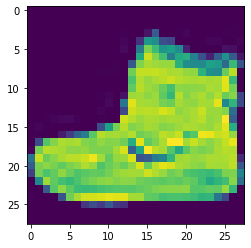

In [98]:
plt.imshow(x_treino[0])

In [99]:
print(y_treino.min())
print(y_treino.max())

# pode-se concluir que existem 10 tipos de classificações
total_classificacoes = 10

0
9


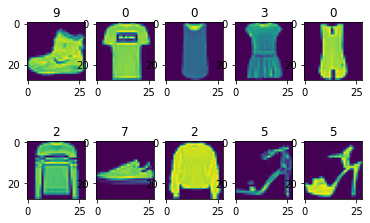

In [100]:
for imagem in range (10):
  plt.subplot(2, 5 , imagem + 1)
  plt.imshow(x_treino[imagem])
  plt.title(y_treino[imagem])

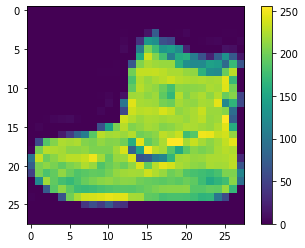

In [101]:
plt.imshow(x_treino[0])
plt.colorbar()

In [102]:
nomes_classificacoes = ['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

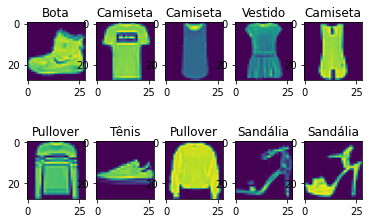

In [103]:
for imagem in range (10):
  plt.subplot(2, 5 , imagem + 1)
  plt.imshow(x_treino[imagem])
  plt.title(nomes_classificacoes[y_treino[imagem]])

Sequência do modelo:
- Entrada
- Processamento
- Saida

# Criando e treinando o modelo

In [104]:
# normalização para reduzir as perdas
x_treino = x_treino / 255.0

In [105]:
"""
1 linha - definindo o modelo com keras, criando a camada 0 achatando as imagens de 28 x 28 pixels em um array de 784 pixels.
2 linha - criando a camada 1, que estabelece comunicação com a camada 0, em todos os componentes. O 256 representa o número de componentes da camada, e o activation é o tipo de comunicação.
3 linha - o dropout serve pra deixar uma parte das camadas dormentes, neste caso foram 20%.
4 linha - o softmax fala qual a porcentagem de cada imagem ser de cada categoria e mostra a maior delas. o 10 é o numero de categorias que temos para classificar.
"""

modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(256, activation = tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5211 - accuracy: 0.8148 - val_loss: 0.4006 - val_accuracy: 0.8576
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3974 - accuracy: 0.8556 - val_loss: 0.3679 - val_accuracy: 0.8692
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3635 - accuracy: 0.8664 - val_loss: 0.3535 - val_accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3380 - accuracy: 0.8751 - val_loss: 0.3444 - val_accuracy: 0.8742
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3233 - accuracy: 0.8816 - val_loss: 0.3322 - val_accuracy: 0.8818


In [106]:
# verificando o historico do modelo
historico.history

{'accuracy': [0.8148124814033508,
  0.8556041717529297,
  0.8663958311080933,
  0.875124990940094,
  0.8815833330154419],
 'loss': [0.5210553407669067,
  0.3974023759365082,
  0.3635099232196808,
  0.3379752039909363,
  0.32329294085502625],
 'val_accuracy': [0.8575833439826965,
  0.8691666722297668,
  0.8725000023841858,
  0.8742499947547913,
  0.8818333148956299],
 'val_loss': [0.40059924125671387,
  0.36788302659988403,
  0.3534899950027466,
  0.3443932831287384,
  0.3321896493434906]}

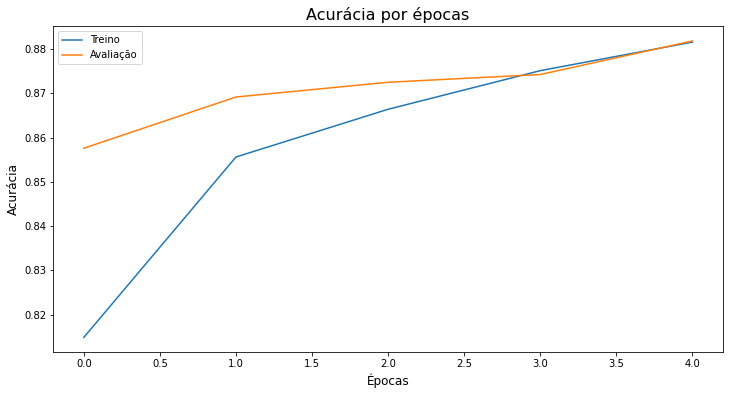

In [107]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Acurácia', fontsize = 12)
plt.legend(['Treino','Avaliação'])

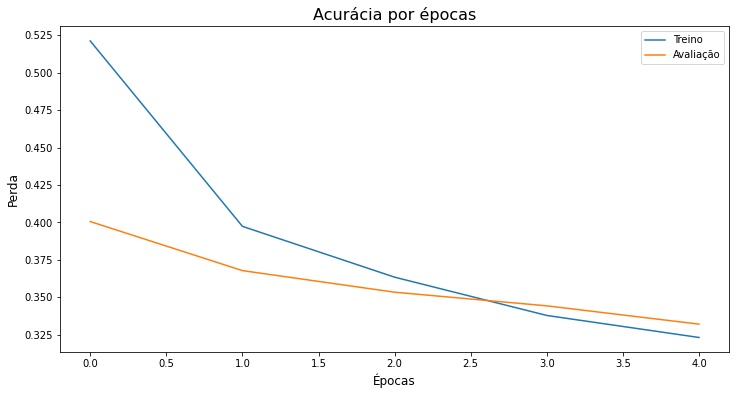

In [108]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acurácia por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Perda', fontsize = 12)
plt.legend(['Treino','Avaliação'])

# Testando o modelo

In [109]:
testes = modelo.predict(x_teste)
print('Resultados do teste: ', np.argmax(testes[0]))
print('Numero da imagem de teste: ', y_teste[0])


Resultados do teste:  9
Numero da imagem de teste:  9


In [110]:
print('Resultados do teste: ', np.argmax(testes[1]))
print('Numero da imagem de teste: ', y_teste[1])

Resultados do teste:  2
Numero da imagem de teste:  2


In [111]:
print('Resultados do teste: ', np.argmax(testes[2]))
print('Numero da imagem de teste: ', y_teste[2])

Resultados do teste:  1
Numero da imagem de teste:  1


# Avaliando o modelo

In [112]:
perda_teste, acuracia_teste = modelo.evaluate(x_teste, y_teste)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 64.2944 - accuracy: 0.8431
Perda do teste:  64.29440307617188
Acuracia do teste:  0.8431000113487244


# Salvando o modelo

In [113]:
# salvando o modelo 
modelo.save('modelo.h5')

# carregando o modelo
modelo_salvo = load_model('modelo.h5')

# Alterações do curso 2

In [114]:
# verificando o sumário do modelo
sumario_do_modelo = modelo.summary()
sumario_do_modelo

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [115]:
# verificando os pesos da primeira camada dense
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.04032803,  0.06030526,  0.04694583, ...,  0.06194342,
        -0.03352206, -0.07312779],
       [ 0.06552541,  0.06074743, -0.12643142, ..., -0.01049151,
         0.04634234,  0.02932961],
       [-0.02138185, -0.0006522 , -0.18200217, ..., -0.02138739,
         0.10050896,  0.02218767],
       ...,
       [ 0.07282867,  0.07576545, -0.11183516, ..., -0.17252295,
         0.07897784,  0.0409878 ],
       [-0.04006267,  0.06101505, -0.04944048, ..., -0.1031983 ,
         0.14856455, -0.0181565 ],
       [-0.04822005,  0.01829178, -0.08330429, ...,  0.05667537,
         0.10367863, -0.01431299]], dtype=float32)

In [116]:
# verificando os vieses da primeira camada dense
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([-0.04993903,  0.12781096,  0.14818108,  0.35677174, -0.13436316,
        0.35306954, -0.00365904,  0.09466651, -0.0160585 ,  0.27195635,
       -0.00889945,  0.11556417,  0.01102716, -0.01004377, -0.45727667,
       -0.06238037,  0.2535862 ,  0.06535659,  0.2508729 , -0.11713273,
       -0.08975888, -0.02862614,  0.25217584, -0.02764504, -0.02688457,
       -0.3223565 , -0.00510906,  0.19272487,  0.13563387,  0.41166124,
        0.29942262,  0.08504034,  0.0235476 ,  0.20837441,  0.27396125,
       -0.14531222,  0.2918578 ,  0.18809697,  0.22709486,  0.42138928,
        0.15601127,  0.14566481,  0.12817441, -0.01210005,  0.00715092,
        0.4708154 ,  0.1354265 ,  0.29386926, -0.17985989,  0.04820047,
        0.2637668 ,  0.14651336,  0.09371106, -0.06148146, -0.0164839 ,
        0.3579614 ,  0.25470406, -0.06692947,  0.3288789 ,  0.516078  ,
        0.07359343,  0.19417939,  0.2249127 , -0.01154793,  0.07413216,
        0.47906137,  0.1537974 ,  0.07340197,  0.3102448 ,  0.10

In [117]:
pesos_camada_dense.shape

(784, 256)

## Zerando os pesos

In [118]:
# zerando os pesos para ver o que muda no modelo
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_zerados

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
# substituindo os pesos no modelo
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

modelo.layers[1].get_weights()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [120]:
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5366 - accuracy: 0.8090 - val_loss: 0.4166 - val_accuracy: 0.8515
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4068 - accuracy: 0.8512 - val_loss: 0.3828 - val_accuracy: 0.8609
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3740 - accuracy: 0.8618 - val_loss: 0.3634 - val_accuracy: 0.8717
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3539 - accuracy: 0.8703 - val_loss: 0.3412 - val_accuracy: 0.8778
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3336 - accuracy: 0.8781 - val_loss: 0.3494 - val_accuracy: 0.8719


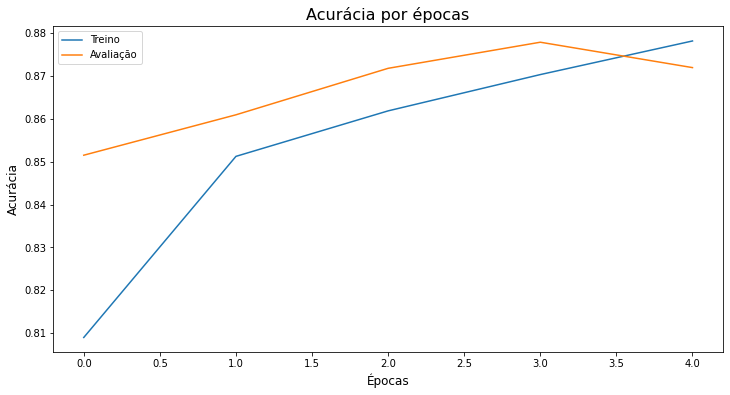

In [121]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Acurácia', fontsize = 12)
plt.legend(['Treino','Avaliação'])

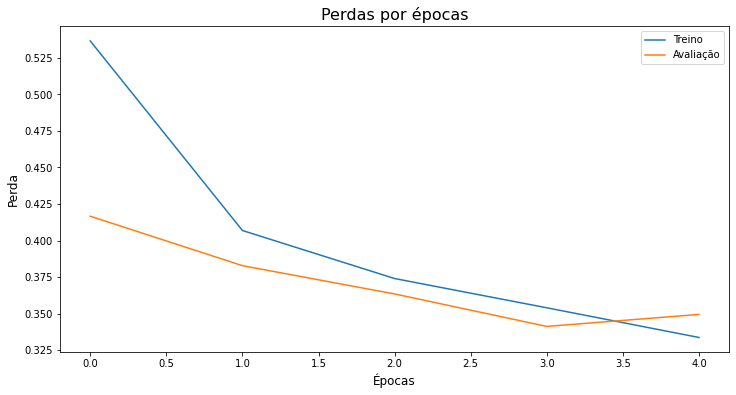

In [122]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Perda', fontsize = 12)
plt.legend(['Treino','Avaliação'])

## Colocando pesos aleatórios

In [123]:
pesos_camada_dense_aleatorios = np.random.rand(784, 256)

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 120.8856 - accuracy: 0.4095 - val_loss: 14.5008 - val_accuracy: 0.7339
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 32.5072 - accuracy: 0.6291 - val_loss: 11.0917 - val_accuracy: 0.7626
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 15.1778 - accuracy: 0.6946 - val_loss: 7.1073 - val_accuracy: 0.7567
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 7.4824 - accuracy: 0.7316 - val_loss: 4.2280 - val_accuracy: 0.7218
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 3.9777 - accuracy: 0.7567 - val_loss: 3.3602 - val_accuracy: 0.7832


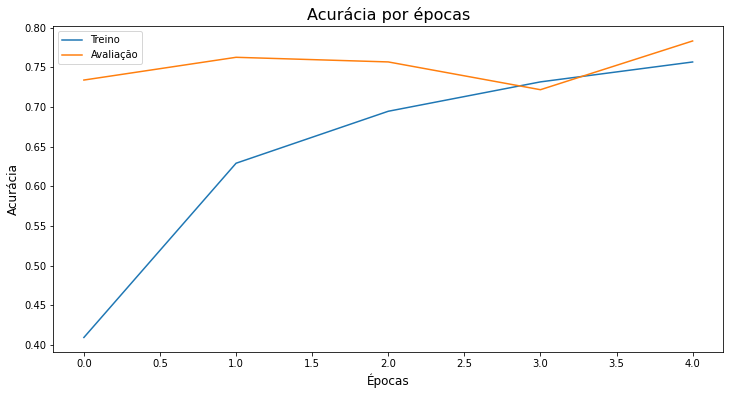

In [124]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Acurácia', fontsize = 12)
plt.legend(['Treino','Avaliação'])

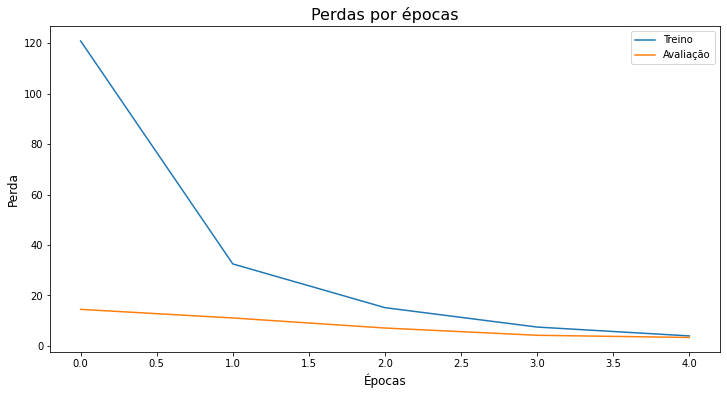

In [125]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Perda', fontsize = 12)
plt.legend(['Treino','Avaliação'])

In [126]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_5_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_5',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_10',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_5',
    'noise_shape': None,
    'rate': 0.2,
    'se

## Alterando os vieses

In [127]:
vieses_camada_dense.shape

(256,)

## Vieses zerados e pesos zerados

In [128]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense_zerados])

In [129]:
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 2.4367 - accuracy: 0.1001 - val_loss: 2.3302 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3104 - accuracy: 0.1001 - val_loss: 2.3035 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.1005
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.0995


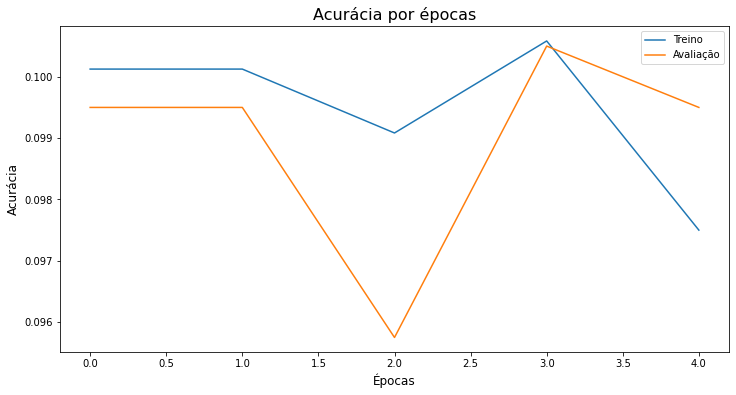

In [130]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Acurácia', fontsize = 12)
plt.legend(['Treino','Avaliação'])

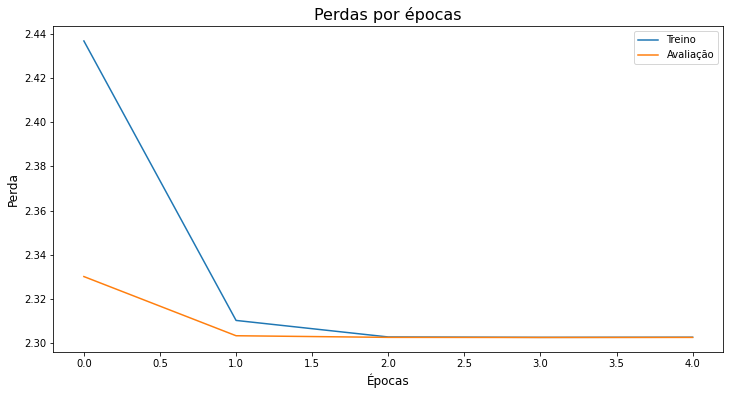

In [131]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Perda', fontsize = 12)
plt.legend(['Treino','Avaliação'])

## Vieses zerados e pesos aleatórios

In [132]:
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

In [133]:
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 41.1097 - accuracy: 0.4023 - val_loss: 8.0053 - val_accuracy: 0.6336
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 11.2431 - accuracy: 0.5800 - val_loss: 6.1870 - val_accuracy: 0.6652
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 6.1695 - accuracy: 0.6419 - val_loss: 3.9116 - val_accuracy: 0.6931
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 3.9384 - accuracy: 0.6750 - val_loss: 2.2235 - val_accuracy: 0.7640
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.4821 - accuracy: 0.7159 - val_loss: 1.6752 - val_accuracy: 0.7506


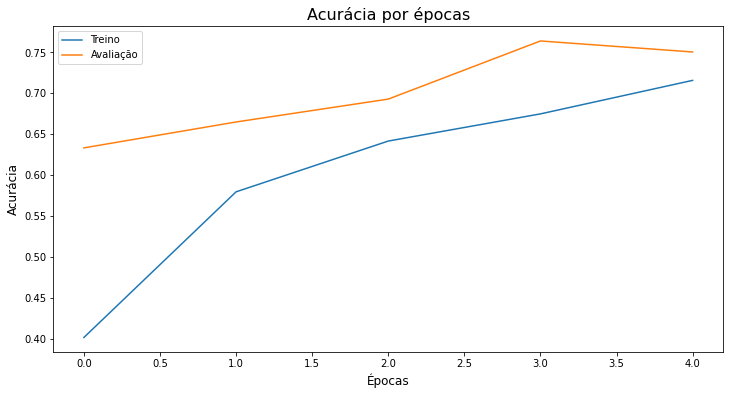

In [134]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Acurácia', fontsize = 12)
plt.legend(['Treino','Avaliação'])

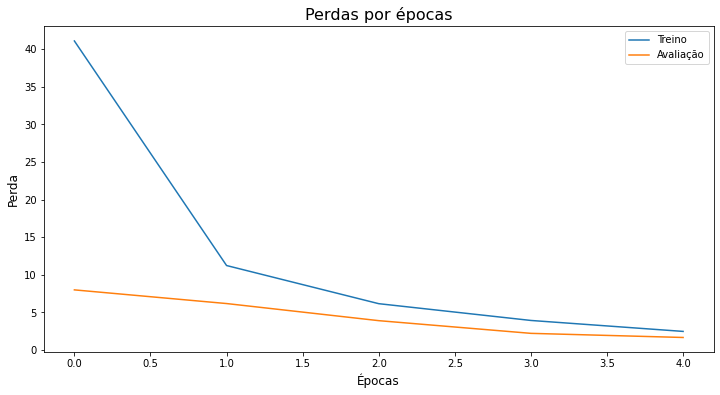

In [135]:
plt.figure(figsize=(12,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas', fontsize = 16)
plt.xlabel('Épocas', fontsize = 12)
plt.ylabel('Perda', fontsize = 12)
plt.legend(['Treino','Avaliação'])

## Alterando os hiperparâmetros

In [136]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(256, activation = tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])

adam = keras.optimizers.Adam(lr = 0.001)

modelo.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1500/1500 [==============================] - 7s 4ms/step - loss: 0.5316 - accuracy: 0.8108 - val_loss: 0.4167 - val_accuracy: 0.8504
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4000 - accuracy: 0.8536 - val_loss: 0.3701 - val_accuracy: 0.8672
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3640 - accuracy: 0.8670 - val_loss: 0.3581 - val_accuracy: 0.8698
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3390 - accuracy: 0.8745 - val_loss: 0.3438 - val_accuracy: 0.8763
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3221 - accuracy: 0.8804 - val_loss: 0.3400 - val_accuracy: 0.8788


In [139]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(256, activation = tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])

adam = keras.optimizers.Adam(learning_rate = 0.5)

modelo.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1500/1500 [==============================] - 7s 5ms/step - loss: 7.8265 - accuracy: 0.1001 - val_loss: 2.4214 - val_accuracy: 0.1013
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3593 - accuracy: 0.1008 - val_loss: 2.3576 - val_accuracy: 0.1027
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3622 - accuracy: 0.0985 - val_loss: 2.3421 - val_accuracy: 0.0995
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3642 - accuracy: 0.0983 - val_loss: 2.3418 - val_accuracy: 0.1003
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3583 - accuracy: 0.1009 - val_loss: 2.3831 - val_accuracy: 0.1005


In [141]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(256, activation = tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])

adam = keras.optimizers.Adam(learning_rate = 0.5)

modelo.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(x_treino, y_treino, batch_size= 16, epochs = 5, validation_split = 0.2)

Epoch 1/5
3000/3000 [==============================] - 13s 4ms/step - loss: 7.1630 - accuracy: 0.1037 - val_loss: 2.3281 - val_accuracy: 0.1004
Epoch 2/5
3000/3000 [==============================] - 12s 4ms/step - loss: 2.3872 - accuracy: 0.1018 - val_loss: 2.3959 - val_accuracy: 0.1028
Epoch 3/5
3000/3000 [==============================] - 12s 4ms/step - loss: 2.3934 - accuracy: 0.0991 - val_loss: 2.3850 - val_accuracy: 0.1004
Epoch 4/5
3000/3000 [==============================] - 17s 6ms/step - loss: 2.3883 - accuracy: 0.0995 - val_loss: 2.4114 - val_accuracy: 0.1028
Epoch 5/5
3000/3000 [==============================] - 12s 4ms/step - loss: 2.3874 - accuracy: 0.0996 - val_loss: 2.3374 - val_accuracy: 0.1004


In [143]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(256, activation = tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])

adam = keras.optimizers.Adam(learning_rate = 0.002)

modelo.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(x_treino, y_treino,  batch_size = 256, epochs = 5, validation_split = 0.2)

Epoch 1/5
188/188 [==============================] - 3s 14ms/step - loss: 0.5810 - accuracy: 0.7956 - val_loss: 0.4277 - val_accuracy: 0.8458
Epoch 2/5
188/188 [==============================] - 2s 10ms/step - loss: 0.4124 - accuracy: 0.8534 - val_loss: 0.3768 - val_accuracy: 0.8646
Epoch 3/5
188/188 [==============================] - 2s 11ms/step - loss: 0.3720 - accuracy: 0.8660 - val_loss: 0.3541 - val_accuracy: 0.8723
Epoch 4/5
188/188 [==============================] - 2s 11ms/step - loss: 0.3472 - accuracy: 0.8738 - val_loss: 0.3454 - val_accuracy: 0.8764
Epoch 5/5
188/188 [==============================] - 2s 10ms/step - loss: 0.3341 - accuracy: 0.8791 - val_loss: 0.3313 - val_accuracy: 0.8821


In [144]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(256, activation = tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])

adam = keras.optimizers.Adam(learning_rate = 0.001)

modelo.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(x_treino, y_treino,  batch_size = 256, epochs = 5, validation_split = 0.2)

Epoch 1/5
188/188 [==============================] - 3s 12ms/step - loss: 0.6418 - accuracy: 0.7786 - val_loss: 0.4535 - val_accuracy: 0.8400
Epoch 2/5
188/188 [==============================] - 2s 11ms/step - loss: 0.4390 - accuracy: 0.8458 - val_loss: 0.3978 - val_accuracy: 0.8619
Epoch 3/5
188/188 [==============================] - 2s 11ms/step - loss: 0.3911 - accuracy: 0.8607 - val_loss: 0.3920 - val_accuracy: 0.8568
Epoch 4/5
188/188 [==============================] - 2s 11ms/step - loss: 0.3638 - accuracy: 0.8701 - val_loss: 0.3646 - val_accuracy: 0.8721
Epoch 5/5
188/188 [==============================] - 2s 11ms/step - loss: 0.3418 - accuracy: 0.8770 - val_loss: 0.3459 - val_accuracy: 0.8758


## Adicionando um callback para parar o treinamento se não estiver obtendo bons resultados e salvando o modelo

In [146]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(256, activation = tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])

adam = keras.optimizers.Adam(learning_rate = 0.5)

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss'), keras.callbacks.ModelCheckpoint(filepath = 'melhor_modelo.hdf5', monitor = 'val_loss', save_best_only = True)]

modelo.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

historico = modelo.fit(x_treino, y_treino,  batch_size = 480, epochs = 5, validation_split = 0.2, callbacks = callbacks)

Epoch 1/5
100/100 [==============================] - 2s 17ms/step - loss: 73.6281 - accuracy: 0.2095 - val_loss: 2.0135 - val_accuracy: 0.2225
Epoch 2/5
100/100 [==============================] - 2s 16ms/step - loss: 2.0998 - accuracy: 0.1922 - val_loss: 2.0666 - val_accuracy: 0.1954
